In [147]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
df = pd.read_csv('charity_data.csv')
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [148]:
# extrac name and EIN
name_df = df[['EIN','NAME']]
name_df.head()

,EIN,NAME
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT


In [149]:
# drop the name and EIN from processing DF
df_drop = df.drop(columns=['EIN', 'NAME'])
df_drop.head(10)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [150]:
# Preprocess ask amount into categories by bins of ask amount
import numpy as np
bins = [0, 500000, 1000000, np.inf ]
ask_range = ['Up_to_1/2M', '1M', 'Over_1M']

df_drop['ASK_Range'] = pd.cut(df_drop['ASK_AMT'], bins, labels=ask_range)

#convert datatype and dropping original
df_drop['ASK_Range1'] = df_drop['ASK_Range'].astype(object)
df_drop = df_drop.drop(columns=['ASK_Range'])

#displaying result
df_drop['ASK_Range1'].sort_values()

19071            1M
30199            1M
657              1M
13890            1M
30193            1M
            ...    
11783    Up_to_1/2M
11782    Up_to_1/2M
11781    Up_to_1/2M
11779    Up_to_1/2M
17149    Up_to_1/2M
Name: ASK_Range1, Length: 34299, dtype: object

In [151]:
# Generate our categorical variable list
df_drop_cat = df_drop.dtypes[df_drop.dtypes == "object"].index.tolist()
df_drop_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_Range1']

In [152]:
# Check the number of unique values in each column
df_drop[df_drop_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_Range1                 3
dtype: int64

In [153]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_drop[df_drop_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_drop_cat)
encode_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_Range1_1M,ASK_Range1_Over_1M,ASK_Range1_Up_to_1/2M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [154]:
# Merge one-hot encoded features and drop the originals
df_drop = df_drop.merge(encode_df,left_index=True, right_index=True)
df_drop = df_drop.drop(df_drop_cat,1)
df_drop.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_Range1_1M,ASK_Range1_Over_1M,ASK_Range1_Up_to_1/2M
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [255]:
len(df_drop.columns)

120

In [156]:
df_drop['ASK_AMT'].sort_values()

0              5000
20358          5000
20356          5000
20355          5000
20354          5000
            ...    
31337    3391919220
24795    4653011914
33678    5591584994
34222    8556638692
33175    8597806340
Name: ASK_AMT, Length: 34299, dtype: int64

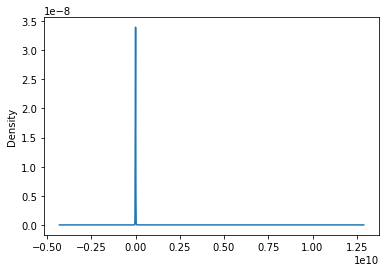

In [157]:
df_drop['ASK_AMT'].plot.density()

In [158]:
# Split our preprocessed data into our features and target arrays
y = df_drop["IS_SUCCESSFUL"].values
X = df_drop.drop(["IS_SUCCESSFUL", 'ASK_AMT'],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [159]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [256]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 80

nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="softmax"))
nn.add(tf.keras.layers.Dropout(0.2))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dropout(0.2))

# 3rd hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))
nn.add(tf.keras.layers.Dropout(0.2))

# 4th hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))
nn.add(tf.keras.layers.Dropout(0.2))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 80)                9520      
_________________________________________________________________
dropout_75 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 80)                6480      
_________________________________________________________________
dropout_76 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 80)                6480      
_________________________________________________________________
dropout_77 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 80)              

In [257]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [258]:
# Compile the model
#nn.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
nn.compile(loss="mean_squared_error", optimizer="Adam", metrics=["accuracy"])
#     Different types of Optimizer:
#         Adagrad
#         RMSprop
#         Adam


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [259]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])


Train on 25724 samples
Epoch 1/200
  896/25724 [>.............................] - ETA: 16s - loss: 0.2563 - accuracy: 0.5022 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1632/25724 [>.............................] - ETA: 9s - loss: 0.2557 - accuracy: 0.5092 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2400/25724 [=>............................] - ETA: 6s - loss: 0.2553 - accuracy: 0.5075
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4032/25724 [===>..........................] - ETA: 4s - loss: 0.2440 - accuracy: 0.5573
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4800/25724 [====>.........................] - ETA: 3s - loss: 0.2396 - accuracy: 0.5788
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5536/25724 [=====>........................] - ETA: 3s - loss: 0.2339 - accuracy: 0.5990
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7104/25724 [=======>......................] - ETA: 2s - loss: 0.2272 - accuracy: 0.62

 4160/25724 [===>..........................] - ETA: 1s - loss: 0.1884 - accuracy: 0.7288
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5600/25724 [=====>........................] - ETA: 1s - loss: 0.1894 - accuracy: 0.7287
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6208/25724 [======>.......................] - ETA: 1s - loss: 0.1913 - accuracy: 0.7257
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7648/25724 [=======>......................] - ETA: 1s - loss: 0.1902 - accuracy: 0.7276
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8224/25724 [========>.....................] - ETA: 1s - loss: 0.1895 - accuracy: 0.7277
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9728/25724 [==========>...................] - ETA: 1s - loss: 0.1889 - accuracy: 0.7294
Epoch 00003: saving model to checkpoints/weights.03.hdf5
10336/25724 [===========>..................] - ETA: 1s - loss: 0.1896 - accuracy: 0.7275
Epoch 00003: saving model to checkp

 8928/25724 [=========>....................] - ETA: 1s - loss: 0.1882 - accuracy: 0.7259
Epoch 00005: saving model to checkpoints/weights.05.hdf5
10464/25724 [===========>..................] - ETA: 1s - loss: 0.1867 - accuracy: 0.7291
Epoch 00005: saving model to checkpoints/weights.05.hdf5
11040/25724 [===========>..................] - ETA: 1s - loss: 0.1876 - accuracy: 0.7274
Epoch 00005: saving model to checkpoints/weights.05.hdf5
12608/25724 [=============>................] - ETA: 0s - loss: 0.1867 - accuracy: 0.7294
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.1863 - accuracy: 0.7308
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14784/25724 [================>.............] - ETA: 0s - loss: 0.1861 - accuracy: 0.7320
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.1858 - accuracy: 0.7328
Epoch 00005: saving model to checkp

13760/25724 [===============>..............] - ETA: 0s - loss: 0.1823 - accuracy: 0.7395
Epoch 00007: saving model to checkpoints/weights.07.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.1825 - accuracy: 0.7397
Epoch 00007: saving model to checkpoints/weights.07.hdf5
16288/25724 [=================>............] - ETA: 0s - loss: 0.1825 - accuracy: 0.7397
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.1822 - accuracy: 0.7403
Epoch 00007: saving model to checkpoints/weights.07.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.1827 - accuracy: 0.7395
Epoch 00007: saving model to checkpoints/weights.07.hdf5
19616/25724 [=====================>........] - ETA: 0s - loss: 0.1834 - accuracy: 0.7383
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.1831 - accuracy: 0.7390
Epoch 00007: saving model to checkp

19040/25724 [=====================>........] - ETA: 0s - loss: 0.1825 - accuracy: 0.7361
Epoch 00009: saving model to checkpoints/weights.09.hdf5
19744/25724 [======================>.......] - ETA: 0s - loss: 0.1824 - accuracy: 0.7359
Epoch 00009: saving model to checkpoints/weights.09.hdf5
21440/25724 [========================>.....] - ETA: 0s - loss: 0.1824 - accuracy: 0.7367
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.1825 - accuracy: 0.7369
Epoch 00009: saving model to checkpoints/weights.09.hdf5
22976/25724 [=========================>....] - ETA: 0s - loss: 0.1827 - accuracy: 0.7364
Epoch 00009: saving model to checkpoints/weights.09.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.1831 - accuracy: 0.7360
Epoch 00009: saving model to checkpoints/weights.09.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.1832 - accuracy: 0.7362
Epoch 00009: saving model to checkp

Epoch 00011: saving model to checkpoints/weights.11.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.1827 - accuracy: 0.7368
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.1824 - accuracy: 0.7375
Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 2s 63us/sample - loss: 0.1823 - accuracy: 0.7376
Epoch 12/200
   32/25724 [..............................] - ETA: 2s - loss: 0.1227 - accuracy: 0.8750
Epoch 00012: saving model to checkpoints/weights.12.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.1846 - accuracy: 0.7350
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.1800 - accuracy: 0.7352
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.1805 - accuracy: 0.7350
Epoch 00012: sa

  768/25724 [..............................] - ETA: 1s - loss: 0.1790 - accuracy: 0.7422
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2400/25724 [=>............................] - ETA: 1s - loss: 0.1785 - accuracy: 0.7358
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3200/25724 [==>...........................] - ETA: 1s - loss: 0.1826 - accuracy: 0.7300
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.1831 - accuracy: 0.7301
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.1812 - accuracy: 0.7340
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.1827 - accuracy: 0.7306
Epoch 00014: saving model to checkpoints/weights.14.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.1824 - accuracy: 0.7324
Epoch 00014: saving model to checkp

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 5728/25724 [=====>........................] - ETA: 1s - loss: 0.1786 - accuracy: 0.7463
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.1798 - accuracy: 0.7428
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8288/25724 [========>.....................] - ETA: 1s - loss: 0.1793 - accuracy: 0.7447
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9024/25724 [=========>....................] - ETA: 1s - loss: 0.1798 - accuracy: 0.7429
Epoch 00016: saving model to checkpoints/weights.16.hdf5
 9792/25724 [==========>...................] - ETA: 0s - loss: 0.1801 - accuracy: 0.7424
Epoch 00016: saving model to checkpoints/weights.16.hdf5
10560/25724 [===========>..................] - ETA: 0s - loss: 0.1801 - accuracy: 0.7425
Epoch 00016: saving model to checkpoints/weights.16.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.17

 9632/25724 [==========>...................] - ETA: 1s - loss: 0.1802 - accuracy: 0.7394
Epoch 00018: saving model to checkpoints/weights.18.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.1809 - accuracy: 0.7382
Epoch 00018: saving model to checkpoints/weights.18.hdf5
11936/25724 [============>.................] - ETA: 0s - loss: 0.1811 - accuracy: 0.7389
Epoch 00018: saving model to checkpoints/weights.18.hdf5
12704/25724 [=============>................] - ETA: 0s - loss: 0.1808 - accuracy: 0.7395
Epoch 00018: saving model to checkpoints/weights.18.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.1812 - accuracy: 0.7388
Epoch 00018: saving model to checkpoints/weights.18.hdf5
15200/25724 [================>.............] - ETA: 0s - loss: 0.1809 - accuracy: 0.7393
Epoch 00018: saving model to checkpoints/weights.18.hdf5
16032/25724 [=================>............] - ETA: 0s - loss: 0.1812 - accuracy: 0.7392
Epoch 00018: saving model to checkp

Epoch 00020: saving model to checkpoints/weights.20.hdf5
14368/25724 [===============>..............] - ETA: 0s - loss: 0.1813 - accuracy: 0.7373
Epoch 00020: saving model to checkpoints/weights.20.hdf5
15968/25724 [=================>............] - ETA: 0s - loss: 0.1815 - accuracy: 0.7372
Epoch 00020: saving model to checkpoints/weights.20.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.1812 - accuracy: 0.7379
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.1812 - accuracy: 0.7383
Epoch 00020: saving model to checkpoints/weights.20.hdf5
18272/25724 [====================>.........] - ETA: 0s - loss: 0.1815 - accuracy: 0.7378
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.1816 - accuracy: 0.7376
Epoch 00020: saving model to checkpoints/weights.20.hdf5
20768/25724 [=======================>......] - ETA: 0s - loss: 0.18

17952/25724 [===================>..........] - ETA: 0s - loss: 0.1814 - accuracy: 0.7372
Epoch 00022: saving model to checkpoints/weights.22.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.1812 - accuracy: 0.7379
Epoch 00022: saving model to checkpoints/weights.22.hdf5
20384/25724 [======================>.......] - ETA: 0s - loss: 0.1809 - accuracy: 0.7381
Epoch 00022: saving model to checkpoints/weights.22.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.1808 - accuracy: 0.7386
Epoch 00022: saving model to checkpoints/weights.22.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.1803 - accuracy: 0.7394
Epoch 00022: saving model to checkpoints/weights.22.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.1805 - accuracy: 0.7388
Epoch 00022: saving model to checkpoints/weights.22.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.1803 - accuracy: 0.7390
Epoch 00022: saving model to checkp

Epoch 00024: saving model to checkpoints/weights.24.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.1801 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints/weights.24.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.1801 - accuracy: 0.7376
Epoch 00024: saving model to checkpoints/weights.24.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.7381
Epoch 00024: saving model to checkpoints/weights.24.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.1800 - accuracy: 0.7385
Epoch 25/200
  864/25724 [>.............................] - ETA: 1s - loss: 0.1788 - accuracy: 0.7477
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.1806 - accuracy: 0.7454
Epoch 00025: saving model to checkpoints/weights.25.hdf5
 2240/25724 [=>............................] - ETA: 1s - loss: 0.1779 - accuracy: 0.7469
Epoch 00025: sa

   32/25724 [..............................] - ETA: 1s - loss: 0.1835 - accuracy: 0.6562
Epoch 00027: saving model to checkpoints/weights.27.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.1855 - accuracy: 0.7300
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 2752/25724 [==>...........................] - ETA: 1s - loss: 0.1769 - accuracy: 0.7456
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 3520/25724 [===>..........................] - ETA: 1s - loss: 0.1814 - accuracy: 0.7361
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 4288/25724 [====>.........................] - ETA: 1s - loss: 0.1807 - accuracy: 0.7386
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5856/25724 [=====>........................] - ETA: 1s - loss: 0.1823 - accuracy: 0.7365
Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6592/25724 [======>.......................] - ETA: 1s - loss: 0.1824 - accuracy: 0.7363
Epoch 00027: saving model to checkp

 5504/25724 [=====>........................] - ETA: 1s - loss: 0.1821 - accuracy: 0.7378
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 6240/25724 [======>.......................] - ETA: 1s - loss: 0.1825 - accuracy: 0.7353
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 6976/25724 [=======>......................] - ETA: 1s - loss: 0.1808 - accuracy: 0.7388
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8608/25724 [=========>....................] - ETA: 1s - loss: 0.1806 - accuracy: 0.7377
Epoch 00029: saving model to checkpoints/weights.29.hdf5
 9408/25724 [=========>....................] - ETA: 1s - loss: 0.1806 - accuracy: 0.7377
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10176/25724 [==========>...................] - ETA: 1s - loss: 0.1804 - accuracy: 0.7380
Epoch 00029: saving model to checkpoints/weights.29.hdf5
10976/25724 [===========>..................] - ETA: 0s - loss: 0.1800 - accuracy: 0.7392
Epoch 00029: saving model to checkp

10112/25724 [==========>...................] - ETA: 1s - loss: 0.1783 - accuracy: 0.7453
Epoch 00031: saving model to checkpoints/weights.31.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.1787 - accuracy: 0.7449
Epoch 00031: saving model to checkpoints/weights.31.hdf5
11616/25724 [============>.................] - ETA: 0s - loss: 0.1787 - accuracy: 0.7459
Epoch 00031: saving model to checkpoints/weights.31.hdf5
13504/25724 [==============>...............] - ETA: 0s - loss: 0.1794 - accuracy: 0.7427
Epoch 00031: saving model to checkpoints/weights.31.hdf5
14272/25724 [===============>..............] - ETA: 0s - loss: 0.1790 - accuracy: 0.7422
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15040/25724 [================>.............] - ETA: 0s - loss: 0.1792 - accuracy: 0.7415
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15776/25724 [=================>............] - ETA: 0s - loss: 0.1787 - accuracy: 0.7426
Epoch 00031: saving model to checkp

13664/25724 [==============>...............] - ETA: 0s - loss: 0.1795 - accuracy: 0.7392
Epoch 00033: saving model to checkpoints/weights.33.hdf5
15264/25724 [================>.............] - ETA: 0s - loss: 0.1798 - accuracy: 0.7387
Epoch 00033: saving model to checkpoints/weights.33.hdf5
16032/25724 [=================>............] - ETA: 0s - loss: 0.1797 - accuracy: 0.7384
Epoch 00033: saving model to checkpoints/weights.33.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.1798 - accuracy: 0.7385
Epoch 00033: saving model to checkpoints/weights.33.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.1803 - accuracy: 0.7376
Epoch 00033: saving model to checkpoints/weights.33.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.1800 - accuracy: 0.7382
Epoch 00033: saving model to checkpoints/weights.33.hdf5
19808/25724 [======================>.......] - ETA: 0s - loss: 0.1795 - accuracy: 0.7389
Epoch 00033: saving model to checkp

Epoch 00035: saving model to checkpoints/weights.35.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.1795 - accuracy: 0.7394
Epoch 00035: saving model to checkpoints/weights.35.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.1798 - accuracy: 0.7390
Epoch 00035: saving model to checkpoints/weights.35.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.1794 - accuracy: 0.7398
Epoch 00035: saving model to checkpoints/weights.35.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 0.1794 - accuracy: 0.7399
Epoch 00035: saving model to checkpoints/weights.35.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.1793 - accuracy: 0.7404
Epoch 00035: saving model to checkpoints/weights.35.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.1793 - accuracy: 0.7404
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.17

22272/25724 [========================>.....] - ETA: 0s - loss: 0.1793 - accuracy: 0.7402
Epoch 00037: saving model to checkpoints/weights.37.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.1788 - accuracy: 0.7409
Epoch 00037: saving model to checkpoints/weights.37.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.1786 - accuracy: 0.7412
Epoch 00037: saving model to checkpoints/weights.37.hdf5
25724/25724 [==============================] - 2s 73us/sample - loss: 0.1792 - accuracy: 0.7397
Epoch 38/200
   32/25724 [..............................] - ETA: 1s - loss: 0.1822 - accuracy: 0.7188
Epoch 00038: saving model to checkpoints/weights.38.hdf5
  704/25724 [..............................] - ETA: 1s - loss: 0.1700 - accuracy: 0.7557
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 2336/25724 [=>............................] - ETA: 1s - loss: 0.1766 - accuracy: 0.7457
Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3072/25724 [==

   32/25724 [..............................] - ETA: 2s - loss: 0.1874 - accuracy: 0.7188
Epoch 00040: saving model to checkpoints/weights.40.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.1787 - accuracy: 0.7383
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 1504/25724 [>.............................] - ETA: 1s - loss: 0.1840 - accuracy: 0.7287
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3136/25724 [==>...........................] - ETA: 1s - loss: 0.1804 - accuracy: 0.7350
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3936/25724 [===>..........................] - ETA: 1s - loss: 0.1787 - accuracy: 0.7401
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 4672/25724 [====>.........................] - ETA: 1s - loss: 0.1775 - accuracy: 0.7432
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 6208/25724 [======>.......................] - ETA: 1s - loss: 0.1779 - accuracy: 0.7421
Epoch 00040: saving model to checkp

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.1761 - accuracy: 0.7414
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 5600/25724 [=====>........................] - ETA: 1s - loss: 0.1767 - accuracy: 0.7421
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.1764 - accuracy: 0.7430
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 7904/25724 [========>.....................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7411
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 8640/25724 [=========>....................] - ETA: 1s - loss: 0.1763 - accuracy: 0.7429
Epoch 00042: saving model to checkpoints/weights.42.hdf5
 9376/25724 [=========>....................] - ETA: 1s - loss: 0.1757 - accuracy: 0.7446
Epoch 00042: saving model to checkpoints/weights.42.hdf5
11040/25724 [===========>..................] - ETA: 0s - loss: 0.17

 7904/25724 [========>.....................] - ETA: 1s - loss: 0.1800 - accuracy: 0.7418
Epoch 00044: saving model to checkpoints/weights.44.hdf5
 9728/25724 [==========>...................] - ETA: 1s - loss: 0.1799 - accuracy: 0.7398
Epoch 00044: saving model to checkpoints/weights.44.hdf5
10464/25724 [===========>..................] - ETA: 0s - loss: 0.1803 - accuracy: 0.7395
Epoch 00044: saving model to checkpoints/weights.44.hdf5
11200/25724 [============>.................] - ETA: 0s - loss: 0.1803 - accuracy: 0.7392
Epoch 00044: saving model to checkpoints/weights.44.hdf5
12896/25724 [==============>...............] - ETA: 0s - loss: 0.1812 - accuracy: 0.7376
Epoch 00044: saving model to checkpoints/weights.44.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.1807 - accuracy: 0.7385
Epoch 00044: saving model to checkpoints/weights.44.hdf5
14432/25724 [===============>..............] - ETA: 0s - loss: 0.1804 - accuracy: 0.7388
Epoch 00044: saving model to checkp

13184/25724 [==============>...............] - ETA: 0s - loss: 0.1778 - accuracy: 0.7401
Epoch 00046: saving model to checkpoints/weights.46.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.1780 - accuracy: 0.7409
Epoch 00046: saving model to checkpoints/weights.46.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.1780 - accuracy: 0.7407
Epoch 00046: saving model to checkpoints/weights.46.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.1776 - accuracy: 0.7415
Epoch 00046: saving model to checkpoints/weights.46.hdf5
17632/25724 [===================>..........] - ETA: 0s - loss: 0.1780 - accuracy: 0.7415
Epoch 00046: saving model to checkpoints/weights.46.hdf5
18368/25724 [====================>.........] - ETA: 0s - loss: 0.1783 - accuracy: 0.7409
Epoch 00046: saving model to checkpoints/weights.46.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.1777 - accuracy: 0.7420
Epoch 00046: saving model to checkp

18272/25724 [====================>.........] - ETA: 0s - loss: 0.1789 - accuracy: 0.7379
Epoch 00048: saving model to checkpoints/weights.48.hdf5
19008/25724 [=====================>........] - ETA: 0s - loss: 0.1790 - accuracy: 0.7375
Epoch 00048: saving model to checkpoints/weights.48.hdf5
19744/25724 [======================>.......] - ETA: 0s - loss: 0.1789 - accuracy: 0.7377
Epoch 00048: saving model to checkpoints/weights.48.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.1791 - accuracy: 0.7381
Epoch 00048: saving model to checkpoints/weights.48.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.1794 - accuracy: 0.7376
Epoch 00048: saving model to checkpoints/weights.48.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.1791 - accuracy: 0.7389
Epoch 00048: saving model to checkpoints/weights.48.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.1792 - accuracy: 0.7383
Epoch 00048: saving model to checkp

22880/25724 [=========================>....] - ETA: 0s - loss: 0.1788 - accuracy: 0.7420
Epoch 00050: saving model to checkpoints/weights.50.hdf5
23616/25724 [==========================>...] - ETA: 0s - loss: 0.1788 - accuracy: 0.7416
Epoch 00050: saving model to checkpoints/weights.50.hdf5
25376/25724 [============================>.] - ETA: 0s - loss: 0.1785 - accuracy: 0.7419
Epoch 00050: saving model to checkpoints/weights.50.hdf5
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1782 - accuracy: 0.7423
Epoch 51/200
   32/25724 [..............................] - ETA: 1s - loss: 0.1760 - accuracy: 0.7500
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.1857 - accuracy: 0.7300
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 0.1860 - accuracy: 0.7297
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 3232/25724 [==

  736/25724 [..............................] - ETA: 1s - loss: 0.1743 - accuracy: 0.7378
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.1747 - accuracy: 0.7488
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 3168/25724 [==>...........................] - ETA: 1s - loss: 0.1782 - accuracy: 0.7434
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 3872/25724 [===>..........................] - ETA: 1s - loss: 0.1781 - accuracy: 0.7438
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 5536/25724 [=====>........................] - ETA: 1s - loss: 0.1772 - accuracy: 0.7462
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 6208/25724 [======>.......................] - ETA: 1s - loss: 0.1802 - accuracy: 0.7403
Epoch 00053: saving model to checkpoints/weights.53.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.1797 - accuracy: 0.7416
Epoch 00053: saving model to checkp

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 5536/25724 [=====>........................] - ETA: 1s - loss: 0.1795 - accuracy: 0.7411
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 7360/25724 [=======>......................] - ETA: 1s - loss: 0.1786 - accuracy: 0.7442
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8160/25724 [========>.....................] - ETA: 1s - loss: 0.1801 - accuracy: 0.7417
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8864/25724 [=========>....................] - ETA: 1s - loss: 0.1799 - accuracy: 0.7413
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 9632/25724 [==========>...................] - ETA: 1s - loss: 0.1805 - accuracy: 0.7396
Epoch 00055: saving model to checkpoints/weights.55.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.1802 - accuracy: 0.7390
Epoch 00055: saving model to checkpoints/weights.55.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.18

 9952/25724 [==========>...................] - ETA: 0s - loss: 0.1762 - accuracy: 0.7439
Epoch 00057: saving model to checkpoints/weights.57.hdf5
10720/25724 [===========>..................] - ETA: 0s - loss: 0.1758 - accuracy: 0.7446
Epoch 00057: saving model to checkpoints/weights.57.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.1771 - accuracy: 0.7425
Epoch 00057: saving model to checkpoints/weights.57.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.1776 - accuracy: 0.7416
Epoch 00057: saving model to checkpoints/weights.57.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.1777 - accuracy: 0.7413
Epoch 00057: saving model to checkpoints/weights.57.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.1773 - accuracy: 0.7417
Epoch 00057: saving model to checkpoints/weights.57.hdf5
15456/25724 [=================>............] - ETA: 0s - loss: 0.1777 - accuracy: 0.7416
Epoch 00057: saving model to checkp

14496/25724 [===============>..............] - ETA: 0s - loss: 0.1763 - accuracy: 0.7461
Epoch 00059: saving model to checkpoints/weights.59.hdf5
16096/25724 [=================>............] - ETA: 0s - loss: 0.1764 - accuracy: 0.7459
Epoch 00059: saving model to checkpoints/weights.59.hdf5
16864/25724 [==================>...........] - ETA: 0s - loss: 0.1763 - accuracy: 0.7457
Epoch 00059: saving model to checkpoints/weights.59.hdf5
17632/25724 [===================>..........] - ETA: 0s - loss: 0.1763 - accuracy: 0.7448
Epoch 00059: saving model to checkpoints/weights.59.hdf5
18400/25724 [====================>.........] - ETA: 0s - loss: 0.1760 - accuracy: 0.7453
Epoch 00059: saving model to checkpoints/weights.59.hdf5
20128/25724 [======================>.......] - ETA: 0s - loss: 0.1761 - accuracy: 0.7450
Epoch 00059: saving model to checkpoints/weights.59.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 0.1763 - accuracy: 0.7448
Epoch 00059: saving model to checkp

19296/25724 [=====================>........] - ETA: 0s - loss: 0.1784 - accuracy: 0.7410
Epoch 00061: saving model to checkpoints/weights.61.hdf5
20928/25724 [=======================>......] - ETA: 0s - loss: 0.1782 - accuracy: 0.7416
Epoch 00061: saving model to checkpoints/weights.61.hdf5
21728/25724 [========================>.....] - ETA: 0s - loss: 0.1786 - accuracy: 0.7405
Epoch 00061: saving model to checkpoints/weights.61.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.1784 - accuracy: 0.7413
Epoch 00061: saving model to checkpoints/weights.61.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.1779 - accuracy: 0.7423
Epoch 00061: saving model to checkpoints/weights.61.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.1781 - accuracy: 0.7419
Epoch 00061: saving model to checkpoints/weights.61.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.1779 - accuracy: 0.7423
Epoch 62/200
   32/25724 [..

24352/25724 [===========================>..] - ETA: 0s - loss: 0.1783 - accuracy: 0.7413
Epoch 00063: saving model to checkpoints/weights.63.hdf5
25724/25724 [==============================] - 2s 64us/sample - loss: 0.1778 - accuracy: 0.7421
Epoch 64/200
   32/25724 [..............................] - ETA: 2s - loss: 0.2298 - accuracy: 0.6250
Epoch 00064: saving model to checkpoints/weights.64.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.1656 - accuracy: 0.7692
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 1568/25724 [>.............................] - ETA: 1s - loss: 0.1742 - accuracy: 0.7500
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2336/25724 [=>............................] - ETA: 1s - loss: 0.1751 - accuracy: 0.7487
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4128/25724 [===>..........................] - ETA: 1s - loss: 0.1757 - accuracy: 0.7461
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4928/25724 [==

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.1787 - accuracy: 0.7473
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 3296/25724 [==>...........................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7512
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 4800/25724 [====>.........................] - ETA: 1s - loss: 0.1772 - accuracy: 0.7475
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 5408/25724 [=====>........................] - ETA: 1s - loss: 0.1779 - accuracy: 0.7448
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.1787 - accuracy: 0.7426
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 7648/25724 [=======>......................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7431
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 8352/25724 [========>.....................] - ETA: 1s - loss: 0.17

 6656/25724 [======>.......................] - ETA: 1s - loss: 0.1785 - accuracy: 0.7408
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.1789 - accuracy: 0.7410
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 8128/25724 [========>.....................] - ETA: 1s - loss: 0.1786 - accuracy: 0.7408
Epoch 00068: saving model to checkpoints/weights.68.hdf5
 9824/25724 [==========>...................] - ETA: 0s - loss: 0.1792 - accuracy: 0.7399
Epoch 00068: saving model to checkpoints/weights.68.hdf5
10656/25724 [===========>..................] - ETA: 0s - loss: 0.1789 - accuracy: 0.7412
Epoch 00068: saving model to checkpoints/weights.68.hdf5
11424/25724 [============>.................] - ETA: 0s - loss: 0.1794 - accuracy: 0.7405
Epoch 00068: saving model to checkpoints/weights.68.hdf5
12192/25724 [=============>................] - ETA: 0s - loss: 0.1787 - accuracy: 0.7419
Epoch 00068: saving model to checkp

Epoch 00070: saving model to checkpoints/weights.70.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.1786 - accuracy: 0.7426
Epoch 00070: saving model to checkpoints/weights.70.hdf5
12512/25724 [=============>................] - ETA: 0s - loss: 0.1783 - accuracy: 0.7415
Epoch 00070: saving model to checkpoints/weights.70.hdf5
13280/25724 [==============>...............] - ETA: 0s - loss: 0.1776 - accuracy: 0.7425
Epoch 00070: saving model to checkpoints/weights.70.hdf5
14016/25724 [===============>..............] - ETA: 0s - loss: 0.1779 - accuracy: 0.7416
Epoch 00070: saving model to checkpoints/weights.70.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.1774 - accuracy: 0.7424
Epoch 00070: saving model to checkpoints/weights.70.hdf5
16320/25724 [==================>...........] - ETA: 0s - loss: 0.1771 - accuracy: 0.7429
Epoch 00070: saving model to checkpoints/weights.70.hdf5
16992/25724 [==================>...........] - ETA: 0s - loss: 0.17

15136/25724 [================>.............] - ETA: 0s - loss: 0.1768 - accuracy: 0.7453
Epoch 00072: saving model to checkpoints/weights.72.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.1767 - accuracy: 0.7460
Epoch 00072: saving model to checkpoints/weights.72.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.1766 - accuracy: 0.7460
Epoch 00072: saving model to checkpoints/weights.72.hdf5
18272/25724 [====================>.........] - ETA: 0s - loss: 0.1766 - accuracy: 0.7461
Epoch 00072: saving model to checkpoints/weights.72.hdf5
19552/25724 [=====================>........] - ETA: 0s - loss: 0.1767 - accuracy: 0.7461
Epoch 00072: saving model to checkpoints/weights.72.hdf5
20064/25724 [======================>.......] - ETA: 0s - loss: 0.1768 - accuracy: 0.7454
Epoch 00072: saving model to checkpoints/weights.72.hdf5
21440/25724 [========================>.....] - ETA: 0s - loss: 0.1769 - accuracy: 0.7450
Epoch 00072: saving model to checkp

Epoch 00074: saving model to checkpoints/weights.74.hdf5
20160/25724 [======================>.......] - ETA: 0s - loss: 0.1786 - accuracy: 0.7410
Epoch 00074: saving model to checkpoints/weights.74.hdf5
20672/25724 [=======================>......] - ETA: 0s - loss: 0.1783 - accuracy: 0.7416
Epoch 00074: saving model to checkpoints/weights.74.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.1780 - accuracy: 0.7421
Epoch 00074: saving model to checkpoints/weights.74.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.1780 - accuracy: 0.7420
Epoch 00074: saving model to checkpoints/weights.74.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.1775 - accuracy: 0.7430
Epoch 00074: saving model to checkpoints/weights.74.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7432
Epoch 00074: saving model to checkpoints/weights.74.hdf5
25724/25724 [==============================] - 2s 86us/sample - los

23296/25724 [==========================>...] - ETA: 0s - loss: 0.1775 - accuracy: 0.7427
Epoch 00076: saving model to checkpoints/weights.76.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.1776 - accuracy: 0.7431
Epoch 00076: saving model to checkpoints/weights.76.hdf5
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1775 - accuracy: 0.7432
Epoch 77/200
   32/25724 [..............................] - ETA: 1s - loss: 0.1666 - accuracy: 0.6875
Epoch 00077: saving model to checkpoints/weights.77.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.1604 - accuracy: 0.7772
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 2336/25724 [=>............................] - ETA: 1s - loss: 0.1714 - accuracy: 0.7551
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 3104/25724 [==>...........................] - ETA: 1s - loss: 0.1761 - accuracy: 0.7461
Epoch 00077: saving model to checkpoints/weights.77.hdf5
 3776/25724 [==

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1472/25724 [>.............................] - ETA: 1s - loss: 0.1793 - accuracy: 0.7330
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7363
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 3808/25724 [===>..........................] - ETA: 1s - loss: 0.1795 - accuracy: 0.7363
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.1781 - accuracy: 0.7418
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 5824/25724 [=====>........................] - ETA: 1s - loss: 0.1790 - accuracy: 0.7390
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 7200/25724 [=======>......................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7394
Epoch 00079: saving model to checkpoints/weights.79.hdf5
 7904/25724 [========>.....................] - ETA: 1s - loss: 0.17

 5696/25724 [=====>........................] - ETA: 1s - loss: 0.1808 - accuracy: 0.7351
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.1799 - accuracy: 0.7372
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8000/25724 [========>.....................] - ETA: 1s - loss: 0.1789 - accuracy: 0.7387
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8736/25724 [=========>....................] - ETA: 1s - loss: 0.1781 - accuracy: 0.7399
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 9472/25724 [==========>...................] - ETA: 1s - loss: 0.1783 - accuracy: 0.7395
Epoch 00081: saving model to checkpoints/weights.81.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.1797 - accuracy: 0.7390
Epoch 00081: saving model to checkpoints/weights.81.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.1802 - accuracy: 0.7382
Epoch 00081: saving model to checkp

Epoch 00083: saving model to checkpoints/weights.83.hdf5
10304/25724 [===========>..................] - ETA: 0s - loss: 0.1782 - accuracy: 0.7399
Epoch 00083: saving model to checkpoints/weights.83.hdf5
12000/25724 [============>.................] - ETA: 0s - loss: 0.1774 - accuracy: 0.7428
Epoch 00083: saving model to checkpoints/weights.83.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.1773 - accuracy: 0.7433
Epoch 00083: saving model to checkpoints/weights.83.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.1775 - accuracy: 0.7431
Epoch 00083: saving model to checkpoints/weights.83.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.1779 - accuracy: 0.7425
Epoch 00083: saving model to checkpoints/weights.83.hdf5
16064/25724 [=================>............] - ETA: 0s - loss: 0.1775 - accuracy: 0.7441
Epoch 00083: saving model to checkpoints/weights.83.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 0.17

14208/25724 [===============>..............] - ETA: 0s - loss: 0.1760 - accuracy: 0.7460
Epoch 00085: saving model to checkpoints/weights.85.hdf5
14944/25724 [================>.............] - ETA: 0s - loss: 0.1756 - accuracy: 0.7464
Epoch 00085: saving model to checkpoints/weights.85.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 0.1754 - accuracy: 0.7465
Epoch 00085: saving model to checkpoints/weights.85.hdf5
17600/25724 [===================>..........] - ETA: 0s - loss: 0.1754 - accuracy: 0.7469
Epoch 00085: saving model to checkpoints/weights.85.hdf5
18336/25724 [====================>.........] - ETA: 0s - loss: 0.1757 - accuracy: 0.7465
Epoch 00085: saving model to checkpoints/weights.85.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.1758 - accuracy: 0.7463
Epoch 00085: saving model to checkpoints/weights.85.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 0.1762 - accuracy: 0.7452
Epoch 00085: saving model to checkp

Epoch 00087: saving model to checkpoints/weights.87.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.1792 - accuracy: 0.7403
Epoch 00087: saving model to checkpoints/weights.87.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.1792 - accuracy: 0.7403
Epoch 00087: saving model to checkpoints/weights.87.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.1787 - accuracy: 0.7413
Epoch 00087: saving model to checkpoints/weights.87.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.1786 - accuracy: 0.7413
Epoch 00087: saving model to checkpoints/weights.87.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.1781 - accuracy: 0.7424
Epoch 00087: saving model to checkpoints/weights.87.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.1779 - accuracy: 0.7429
Epoch 00087: saving model to checkpoints/weights.87.hdf5
25724/25724 [==============================] - 2s 65us/sample - los

22688/25724 [=========================>....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7434
Epoch 00089: saving model to checkpoints/weights.89.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.1773 - accuracy: 0.7431
Epoch 00089: saving model to checkpoints/weights.89.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.1773 - accuracy: 0.7431
Epoch 00089: saving model to checkpoints/weights.89.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.1775 - accuracy: 0.7430
Epoch 90/200
   32/25724 [..............................] - ETA: 2s - loss: 0.1148 - accuracy: 0.9062
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.1857 - accuracy: 0.7315
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 2368/25724 [=>............................] - ETA: 1s - loss: 0.1806 - accuracy: 0.7399
Epoch 00090: saving model to checkpoints/weights.90.hdf5
 3104/25724 [==

Epoch 00092: saving model to checkpoints/weights.92.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.1710 - accuracy: 0.7604
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 2592/25724 [==>...........................] - ETA: 1s - loss: 0.1760 - accuracy: 0.7473
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.1749 - accuracy: 0.7473
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4064/25724 [===>..........................] - ETA: 1s - loss: 0.1766 - accuracy: 0.7421
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 5728/25724 [=====>........................] - ETA: 1s - loss: 0.1760 - accuracy: 0.7448
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 6464/25724 [======>.......................] - ETA: 1s - loss: 0.1762 - accuracy: 0.7438
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 7232/25724 [=======>......................] - ETA: 1s - loss: 0.17

 4800/25724 [====>.........................] - ETA: 1s - loss: 0.1806 - accuracy: 0.7377
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 6432/25724 [======>.......................] - ETA: 1s - loss: 0.1816 - accuracy: 0.7354
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.1815 - accuracy: 0.7359
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7968/25724 [========>.....................] - ETA: 1s - loss: 0.1795 - accuracy: 0.7393
Epoch 00094: saving model to checkpoints/weights.94.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 0.1794 - accuracy: 0.7397
Epoch 00094: saving model to checkpoints/weights.94.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.1797 - accuracy: 0.7397
Epoch 00094: saving model to checkpoints/weights.94.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.1800 - accuracy: 0.7393
Epoch 00094: saving model to checkp

10016/25724 [==========>...................] - ETA: 0s - loss: 0.1767 - accuracy: 0.7416
Epoch 00096: saving model to checkpoints/weights.96.hdf5
10784/25724 [===========>..................] - ETA: 0s - loss: 0.1762 - accuracy: 0.7429
Epoch 00096: saving model to checkpoints/weights.96.hdf5
11552/25724 [============>.................] - ETA: 0s - loss: 0.1766 - accuracy: 0.7435
Epoch 00096: saving model to checkpoints/weights.96.hdf5
13344/25724 [==============>...............] - ETA: 0s - loss: 0.1766 - accuracy: 0.7430
Epoch 00096: saving model to checkpoints/weights.96.hdf5
14112/25724 [===============>..............] - ETA: 0s - loss: 0.1763 - accuracy: 0.7435
Epoch 00096: saving model to checkpoints/weights.96.hdf5
14784/25724 [================>.............] - ETA: 0s - loss: 0.1763 - accuracy: 0.7434
Epoch 00096: saving model to checkpoints/weights.96.hdf5
16448/25724 [==================>...........] - ETA: 0s - loss: 0.1761 - accuracy: 0.7434
Epoch 00096: saving model to checkp

Epoch 00098: saving model to checkpoints/weights.98.hdf5
14528/25724 [===============>..............] - ETA: 0s - loss: 0.1762 - accuracy: 0.7474
Epoch 00098: saving model to checkpoints/weights.98.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.1758 - accuracy: 0.7475
Epoch 00098: saving model to checkpoints/weights.98.hdf5
17248/25724 [===================>..........] - ETA: 0s - loss: 0.1768 - accuracy: 0.7452
Epoch 00098: saving model to checkpoints/weights.98.hdf5
18016/25724 [====================>.........] - ETA: 0s - loss: 0.1767 - accuracy: 0.7447
Epoch 00098: saving model to checkpoints/weights.98.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.1768 - accuracy: 0.7447
Epoch 00098: saving model to checkpoints/weights.98.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.1770 - accuracy: 0.7448
Epoch 00098: saving model to checkpoints/weights.98.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.17

18976/25724 [=====================>........] - ETA: 0s - loss: 0.1764 - accuracy: 0.7442
Epoch 00100: saving model to checkpoints/weights.100.hdf5
19776/25724 [======================>.......] - ETA: 0s - loss: 0.1763 - accuracy: 0.7447
Epoch 00100: saving model to checkpoints/weights.100.hdf5
20544/25724 [======================>.......] - ETA: 0s - loss: 0.1761 - accuracy: 0.7453
Epoch 00100: saving model to checkpoints/weights.100.hdf5
21312/25724 [=======================>......] - ETA: 0s - loss: 0.1763 - accuracy: 0.7447
Epoch 00100: saving model to checkpoints/weights.100.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.1768 - accuracy: 0.7432
Epoch 00100: saving model to checkpoints/weights.100.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.1767 - accuracy: 0.7433
Epoch 00100: saving model to checkpoints/weights.100.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.1767 - accuracy: 0.7436
Epoch 00100: saving model to 

22560/25724 [=========================>....] - ETA: 0s - loss: 0.1770 - accuracy: 0.7436
Epoch 00102: saving model to checkpoints/weights.102.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.1769 - accuracy: 0.7439
Epoch 00102: saving model to checkpoints/weights.102.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.1770 - accuracy: 0.7439
Epoch 00102: saving model to checkpoints/weights.102.hdf5
25724/25724 [==============================] - 2s 63us/sample - loss: 0.1771 - accuracy: 0.7436
Epoch 103/200
   32/25724 [..............................] - ETA: 2s - loss: 0.2003 - accuracy: 0.6250
Epoch 00103: saving model to checkpoints/weights.103.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.1805 - accuracy: 0.7215
Epoch 00103: saving model to checkpoints/weights.103.hdf5
 1504/25724 [>.............................] - ETA: 1s - loss: 0.1824 - accuracy: 0.7234
Epoch 00103: saving model to checkpoints/weights.103.hdf5
 3200/25

Epoch 105/200
  960/25724 [>.............................] - ETA: 1s - loss: 0.1785 - accuracy: 0.7437
Epoch 00105: saving model to checkpoints/weights.105.hdf5
 1760/25724 [=>............................] - ETA: 1s - loss: 0.1781 - accuracy: 0.7437
Epoch 00105: saving model to checkpoints/weights.105.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 0.1780 - accuracy: 0.7427
Epoch 00105: saving model to checkpoints/weights.105.hdf5
 3232/25724 [==>...........................] - ETA: 1s - loss: 0.1782 - accuracy: 0.7420
Epoch 00105: saving model to checkpoints/weights.105.hdf5
 4928/25724 [====>.........................] - ETA: 1s - loss: 0.1792 - accuracy: 0.7403
Epoch 00105: saving model to checkpoints/weights.105.hdf5
 5728/25724 [=====>........................] - ETA: 1s - loss: 0.1799 - accuracy: 0.7371
Epoch 00105: saving model to checkpoints/weights.105.hdf5
 6432/25724 [======>.......................] - ETA: 1s - loss: 0.1797 - accuracy: 0.7369
Epoch 00105: sa

 4096/25724 [===>..........................] - ETA: 1s - loss: 0.1766 - accuracy: 0.7429
Epoch 00107: saving model to checkpoints/weights.107.hdf5
 4928/25724 [====>.........................] - ETA: 1s - loss: 0.1759 - accuracy: 0.7457
Epoch 00107: saving model to checkpoints/weights.107.hdf5
 6816/25724 [======>.......................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7437
Epoch 00107: saving model to checkpoints/weights.107.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.1775 - accuracy: 0.7425
Epoch 00107: saving model to checkpoints/weights.107.hdf5
 8352/25724 [========>.....................] - ETA: 1s - loss: 0.1772 - accuracy: 0.7440
Epoch 00107: saving model to checkpoints/weights.107.hdf5
 9120/25724 [=========>....................] - ETA: 1s - loss: 0.1773 - accuracy: 0.7432
Epoch 00107: saving model to checkpoints/weights.107.hdf5
10848/25724 [===========>..................] - ETA: 0s - loss: 0.1785 - accuracy: 0.7400
Epoch 00107: saving model to 

 8032/25724 [========>.....................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7438
Epoch 00109: saving model to checkpoints/weights.109.hdf5
 9664/25724 [==========>...................] - ETA: 1s - loss: 0.1778 - accuracy: 0.7434
Epoch 00109: saving model to checkpoints/weights.109.hdf5
10400/25724 [===========>..................] - ETA: 0s - loss: 0.1781 - accuracy: 0.7412
Epoch 00109: saving model to checkpoints/weights.109.hdf5
11072/25724 [===========>..................] - ETA: 0s - loss: 0.1780 - accuracy: 0.7421
Epoch 00109: saving model to checkpoints/weights.109.hdf5
12704/25724 [=============>................] - ETA: 0s - loss: 0.1781 - accuracy: 0.7420
Epoch 00109: saving model to checkpoints/weights.109.hdf5
13472/25724 [==============>...............] - ETA: 0s - loss: 0.1780 - accuracy: 0.7422
Epoch 00109: saving model to checkpoints/weights.109.hdf5
14176/25724 [===============>..............] - ETA: 0s - loss: 0.1781 - accuracy: 0.7421
Epoch 00109: saving model to 

12512/25724 [=============>................] - ETA: 0s - loss: 0.1764 - accuracy: 0.7453
Epoch 00111: saving model to checkpoints/weights.111.hdf5
13280/25724 [==============>...............] - ETA: 0s - loss: 0.1767 - accuracy: 0.7453
Epoch 00111: saving model to checkpoints/weights.111.hdf5
14048/25724 [===============>..............] - ETA: 0s - loss: 0.1773 - accuracy: 0.7439
Epoch 00111: saving model to checkpoints/weights.111.hdf5
14784/25724 [================>.............] - ETA: 0s - loss: 0.1772 - accuracy: 0.7445
Epoch 00111: saving model to checkpoints/weights.111.hdf5
16512/25724 [==================>...........] - ETA: 0s - loss: 0.1774 - accuracy: 0.7441
Epoch 00111: saving model to checkpoints/weights.111.hdf5
17184/25724 [===================>..........] - ETA: 0s - loss: 0.1772 - accuracy: 0.7447
Epoch 00111: saving model to checkpoints/weights.111.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.1770 - accuracy: 0.7447
Epoch 00111: saving model to 

16032/25724 [=================>............] - ETA: 0s - loss: 0.1766 - accuracy: 0.7446
Epoch 00113: saving model to checkpoints/weights.113.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.1767 - accuracy: 0.7442
Epoch 00113: saving model to checkpoints/weights.113.hdf5
18336/25724 [====================>.........] - ETA: 0s - loss: 0.1764 - accuracy: 0.7447
Epoch 00113: saving model to checkpoints/weights.113.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.1771 - accuracy: 0.7436
Epoch 00113: saving model to checkpoints/weights.113.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.1775 - accuracy: 0.7430
Epoch 00113: saving model to checkpoints/weights.113.hdf5
21472/25724 [========================>.....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7436
Epoch 00113: saving model to checkpoints/weights.113.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.1768 - accuracy: 0.7446
Epoch 00113: saving model to 

19648/25724 [=====================>........] - ETA: 0s - loss: 0.1763 - accuracy: 0.7456
Epoch 00115: saving model to checkpoints/weights.115.hdf5
20416/25724 [======================>.......] - ETA: 0s - loss: 0.1763 - accuracy: 0.7456
Epoch 00115: saving model to checkpoints/weights.115.hdf5
22176/25724 [========================>.....] - ETA: 0s - loss: 0.1765 - accuracy: 0.7450
Epoch 00115: saving model to checkpoints/weights.115.hdf5
22976/25724 [=========================>....] - ETA: 0s - loss: 0.1765 - accuracy: 0.7452
Epoch 00115: saving model to checkpoints/weights.115.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.1765 - accuracy: 0.7452
Epoch 00115: saving model to checkpoints/weights.115.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.1767 - accuracy: 0.7445
Epoch 00115: saving model to checkpoints/weights.115.hdf5
25724/25724 [==============================] - 2s 63us/sample - loss: 0.1770 - accuracy: 0.7443
Epoch 116/200
   32/25

23744/25724 [==========================>...] - ETA: 0s - loss: 0.1770 - accuracy: 0.7428
Epoch 00117: saving model to checkpoints/weights.117.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.1771 - accuracy: 0.7428
Epoch 00117: saving model to checkpoints/weights.117.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.1772 - accuracy: 0.7427
Epoch 118/200
   32/25724 [..............................] - ETA: 2s - loss: 0.1351 - accuracy: 0.7812
Epoch 00118: saving model to checkpoints/weights.118.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.1705 - accuracy: 0.7617
Epoch 00118: saving model to checkpoints/weights.118.hdf5
 1504/25724 [>.............................] - ETA: 1s - loss: 0.1766 - accuracy: 0.7453
Epoch 00118: saving model to checkpoints/weights.118.hdf5
 3360/25724 [==>...........................] - ETA: 1s - loss: 0.1783 - accuracy: 0.7423
Epoch 00118: saving model to checkpoints/weights.118.hdf5
 4128/25

  768/25724 [..............................] - ETA: 1s - loss: 0.1812 - accuracy: 0.7318
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.1761 - accuracy: 0.7415
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 2304/25724 [=>............................] - ETA: 1s - loss: 0.1774 - accuracy: 0.7383
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 4160/25724 [===>..........................] - ETA: 1s - loss: 0.1781 - accuracy: 0.7375
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 4960/25724 [====>.........................] - ETA: 1s - loss: 0.1778 - accuracy: 0.7399
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 5728/25724 [=====>........................] - ETA: 1s - loss: 0.1778 - accuracy: 0.7409
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 6496/25724 [======>.......................] - ETA: 1s - loss: 0.1778 - accuracy: 0.7415
Epoch 00120: saving model to 

 4032/25724 [===>..........................] - ETA: 1s - loss: 0.1768 - accuracy: 0.7428
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.1762 - accuracy: 0.7458
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 6688/25724 [======>.......................] - ETA: 1s - loss: 0.1757 - accuracy: 0.7493
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 7456/25724 [=======>......................] - ETA: 1s - loss: 0.1758 - accuracy: 0.7491
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 8224/25724 [========>.....................] - ETA: 1s - loss: 0.1756 - accuracy: 0.7493
Epoch 00122: saving model to checkpoints/weights.122.hdf5
10080/25724 [==========>...................] - ETA: 0s - loss: 0.1765 - accuracy: 0.7458
Epoch 00122: saving model to checkpoints/weights.122.hdf5
10848/25724 [===========>..................] - ETA: 0s - loss: 0.1765 - accuracy: 0.7459
Epoch 00122: saving model to 

 8416/25724 [========>.....................] - ETA: 1s - loss: 0.1760 - accuracy: 0.7495
Epoch 00124: saving model to checkpoints/weights.124.hdf5
 9120/25724 [=========>....................] - ETA: 1s - loss: 0.1769 - accuracy: 0.7489
Epoch 00124: saving model to checkpoints/weights.124.hdf5
10784/25724 [===========>..................] - ETA: 0s - loss: 0.1781 - accuracy: 0.7446
Epoch 00124: saving model to checkpoints/weights.124.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.1775 - accuracy: 0.7457
Epoch 00124: saving model to checkpoints/weights.124.hdf5
12256/25724 [=============>................] - ETA: 0s - loss: 0.1774 - accuracy: 0.7460
Epoch 00124: saving model to checkpoints/weights.124.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.1770 - accuracy: 0.7467
Epoch 00124: saving model to checkpoints/weights.124.hdf5
14816/25724 [================>.............] - ETA: 0s - loss: 0.1769 - accuracy: 0.7463
Epoch 00124: saving model to 

12032/25724 [=============>................] - ETA: 0s - loss: 0.1791 - accuracy: 0.7414
Epoch 00126: saving model to checkpoints/weights.126.hdf5
13664/25724 [==============>...............] - ETA: 0s - loss: 0.1778 - accuracy: 0.7436
Epoch 00126: saving model to checkpoints/weights.126.hdf5
14400/25724 [===============>..............] - ETA: 0s - loss: 0.1776 - accuracy: 0.7437
Epoch 00126: saving model to checkpoints/weights.126.hdf5
15168/25724 [================>.............] - ETA: 0s - loss: 0.1773 - accuracy: 0.7443
Epoch 00126: saving model to checkpoints/weights.126.hdf5
15936/25724 [=================>............] - ETA: 0s - loss: 0.1770 - accuracy: 0.7448
Epoch 00126: saving model to checkpoints/weights.126.hdf5
17696/25724 [===================>..........] - ETA: 0s - loss: 0.1766 - accuracy: 0.7455
Epoch 00126: saving model to checkpoints/weights.126.hdf5
18400/25724 [====================>.........] - ETA: 0s - loss: 0.1768 - accuracy: 0.7451
Epoch 00126: saving model to 

15680/25724 [=================>............] - ETA: 0s - loss: 0.1774 - accuracy: 0.7422
Epoch 00128: saving model to checkpoints/weights.128.hdf5
17440/25724 [===================>..........] - ETA: 0s - loss: 0.1768 - accuracy: 0.7442
Epoch 00128: saving model to checkpoints/weights.128.hdf5
18240/25724 [====================>.........] - ETA: 0s - loss: 0.1774 - accuracy: 0.7429
Epoch 00128: saving model to checkpoints/weights.128.hdf5
18976/25724 [=====================>........] - ETA: 0s - loss: 0.1769 - accuracy: 0.7441
Epoch 00128: saving model to checkpoints/weights.128.hdf5
20544/25724 [======================>.......] - ETA: 0s - loss: 0.1768 - accuracy: 0.7442
Epoch 00128: saving model to checkpoints/weights.128.hdf5
21344/25724 [=======================>......] - ETA: 0s - loss: 0.1766 - accuracy: 0.7448
Epoch 00128: saving model to checkpoints/weights.128.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.1767 - accuracy: 0.7448
Epoch 00128: saving model to 

19712/25724 [=====================>........] - ETA: 0s - loss: 0.1776 - accuracy: 0.7427
Epoch 00130: saving model to checkpoints/weights.130.hdf5
21312/25724 [=======================>......] - ETA: 0s - loss: 0.1771 - accuracy: 0.7428
Epoch 00130: saving model to checkpoints/weights.130.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7430
Epoch 00130: saving model to checkpoints/weights.130.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7434
Epoch 00130: saving model to checkpoints/weights.130.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.1768 - accuracy: 0.7437
Epoch 00130: saving model to checkpoints/weights.130.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.1763 - accuracy: 0.7443
Epoch 00130: saving model to checkpoints/weights.130.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.1765 - accuracy: 0.7441
Epoch 131/200
   32/25

23360/25724 [==========================>...] - ETA: 0s - loss: 0.1771 - accuracy: 0.7446
Epoch 00132: saving model to checkpoints/weights.132.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.7445
Epoch 00132: saving model to checkpoints/weights.132.hdf5
25724/25724 [==============================] - 2s 63us/sample - loss: 0.1769 - accuracy: 0.7446
Epoch 133/200
   32/25724 [..............................] - ETA: 2s - loss: 0.1181 - accuracy: 0.8438
Epoch 00133: saving model to checkpoints/weights.133.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.1817 - accuracy: 0.7370
Epoch 00133: saving model to checkpoints/weights.133.hdf5
 2496/25724 [=>............................] - ETA: 1s - loss: 0.1796 - accuracy: 0.7404
Epoch 00133: saving model to checkpoints/weights.133.hdf5
 3296/25724 [==>...........................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7442
Epoch 00133: saving model to checkpoints/weights.133.hdf5
 4032/25

  800/25724 [..............................] - ETA: 1s - loss: 0.1727 - accuracy: 0.7575
Epoch 00135: saving model to checkpoints/weights.135.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.1734 - accuracy: 0.7578
Epoch 00135: saving model to checkpoints/weights.135.hdf5
 3232/25724 [==>...........................] - ETA: 1s - loss: 0.1793 - accuracy: 0.7420
Epoch 00135: saving model to checkpoints/weights.135.hdf5
 4032/25724 [===>..........................] - ETA: 1s - loss: 0.1795 - accuracy: 0.7411
Epoch 00135: saving model to checkpoints/weights.135.hdf5
 4672/25724 [====>.........................] - ETA: 1s - loss: 0.1772 - accuracy: 0.7470
Epoch 00135: saving model to checkpoints/weights.135.hdf5
 6208/25724 [======>.......................] - ETA: 1s - loss: 0.1761 - accuracy: 0.7471
Epoch 00135: saving model to checkpoints/weights.135.hdf5
 7008/25724 [=======>......................] - ETA: 1s - loss: 0.1776 - accuracy: 0.7446
Epoch 00135: saving model to 

 4736/25724 [====>.........................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7439
Epoch 00137: saving model to checkpoints/weights.137.hdf5
 5472/25724 [=====>........................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7429
Epoch 00137: saving model to checkpoints/weights.137.hdf5
 7072/25724 [=======>......................] - ETA: 1s - loss: 0.1780 - accuracy: 0.7432
Epoch 00137: saving model to checkpoints/weights.137.hdf5
 7840/25724 [========>.....................] - ETA: 1s - loss: 0.1771 - accuracy: 0.7457
Epoch 00137: saving model to checkpoints/weights.137.hdf5
 8608/25724 [=========>....................] - ETA: 1s - loss: 0.1765 - accuracy: 0.7459
Epoch 00137: saving model to checkpoints/weights.137.hdf5
 9376/25724 [=========>....................] - ETA: 1s - loss: 0.1765 - accuracy: 0.7464
Epoch 00137: saving model to checkpoints/weights.137.hdf5
11168/25724 [============>.................] - ETA: 0s - loss: 0.1769 - accuracy: 0.7462
Epoch 00137: saving model to 

 8864/25724 [=========>....................] - ETA: 1s - loss: 0.1771 - accuracy: 0.7431
Epoch 00139: saving model to checkpoints/weights.139.hdf5
 9568/25724 [==========>...................] - ETA: 1s - loss: 0.1763 - accuracy: 0.7447
Epoch 00139: saving model to checkpoints/weights.139.hdf5
10304/25724 [===========>..................] - ETA: 0s - loss: 0.1754 - accuracy: 0.7462
Epoch 00139: saving model to checkpoints/weights.139.hdf5
11968/25724 [============>.................] - ETA: 0s - loss: 0.1748 - accuracy: 0.7465
Epoch 00139: saving model to checkpoints/weights.139.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.1755 - accuracy: 0.7455
Epoch 00139: saving model to checkpoints/weights.139.hdf5
13600/25724 [==============>...............] - ETA: 0s - loss: 0.1761 - accuracy: 0.7449
Epoch 00139: saving model to checkpoints/weights.139.hdf5
14432/25724 [===============>..............] - ETA: 0s - loss: 0.1764 - accuracy: 0.7444
Epoch 00139: saving model to 

12032/25724 [=============>................] - ETA: 0s - loss: 0.1780 - accuracy: 0.7401
Epoch 00141: saving model to checkpoints/weights.141.hdf5
13728/25724 [===============>..............] - ETA: 0s - loss: 0.1776 - accuracy: 0.7416
Epoch 00141: saving model to checkpoints/weights.141.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.1779 - accuracy: 0.7409
Epoch 00141: saving model to checkpoints/weights.141.hdf5
15264/25724 [================>.............] - ETA: 0s - loss: 0.1782 - accuracy: 0.7411
Epoch 00141: saving model to checkpoints/weights.141.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.1779 - accuracy: 0.7417
Epoch 00141: saving model to checkpoints/weights.141.hdf5
17824/25724 [===================>..........] - ETA: 0s - loss: 0.1769 - accuracy: 0.7434
Epoch 00141: saving model to checkpoints/weights.141.hdf5
18592/25724 [====================>.........] - ETA: 0s - loss: 0.1769 - accuracy: 0.7434
Epoch 00141: saving model to 

16064/25724 [=================>............] - ETA: 0s - loss: 0.1773 - accuracy: 0.7443
Epoch 00143: saving model to checkpoints/weights.143.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 0.1774 - accuracy: 0.7443
Epoch 00143: saving model to checkpoints/weights.143.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.1775 - accuracy: 0.7440
Epoch 00143: saving model to checkpoints/weights.143.hdf5
19360/25724 [=====================>........] - ETA: 0s - loss: 0.1774 - accuracy: 0.7440
Epoch 00143: saving model to checkpoints/weights.143.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.1776 - accuracy: 0.7438
Epoch 00143: saving model to checkpoints/weights.143.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 0.1780 - accuracy: 0.7430
Epoch 00143: saving model to checkpoints/weights.143.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.1777 - accuracy: 0.7437
Epoch 00143: saving model to 

19904/25724 [======================>.......] - ETA: 0s - loss: 0.1757 - accuracy: 0.7459
Epoch 00145: saving model to checkpoints/weights.145.hdf5
21152/25724 [=======================>......] - ETA: 0s - loss: 0.1759 - accuracy: 0.7458
Epoch 00145: saving model to checkpoints/weights.145.hdf5
22496/25724 [=========================>....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7449
Epoch 00145: saving model to checkpoints/weights.145.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7448
Epoch 00145: saving model to checkpoints/weights.145.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.1763 - accuracy: 0.7451
Epoch 00145: saving model to checkpoints/weights.145.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.1764 - accuracy: 0.7451
Epoch 00145: saving model to checkpoints/weights.145.hdf5
25724/25724 [==============================] - 2s 81us/sample - loss: 0.1766 - accuracy: 0.7450
Epoch 146/200
  736/25

23680/25724 [==========================>...] - ETA: 0s - loss: 0.1767 - accuracy: 0.7454
Epoch 00147: saving model to checkpoints/weights.147.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.1768 - accuracy: 0.7450
Epoch 00147: saving model to checkpoints/weights.147.hdf5
25724/25724 [==============================] - 2s 69us/sample - loss: 0.1772 - accuracy: 0.7445
Epoch 148/200
   32/25724 [..............................] - ETA: 2s - loss: 0.1897 - accuracy: 0.7188
Epoch 00148: saving model to checkpoints/weights.148.hdf5
 1632/25724 [>.............................] - ETA: 1s - loss: 0.1797 - accuracy: 0.7426
Epoch 00148: saving model to checkpoints/weights.148.hdf5
 2336/25724 [=>............................] - ETA: 1s - loss: 0.1801 - accuracy: 0.7393
Epoch 00148: saving model to checkpoints/weights.148.hdf5
 3040/25724 [==>...........................] - ETA: 1s - loss: 0.1777 - accuracy: 0.7434
Epoch 00148: saving model to checkpoints/weights.148.hdf5
 4640/25

  832/25724 [..............................] - ETA: 1s - loss: 0.1889 - accuracy: 0.7236
Epoch 00150: saving model to checkpoints/weights.150.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.1833 - accuracy: 0.7272
Epoch 00150: saving model to checkpoints/weights.150.hdf5
 3392/25724 [==>...........................] - ETA: 1s - loss: 0.1823 - accuracy: 0.7314
Epoch 00150: saving model to checkpoints/weights.150.hdf5
 4256/25724 [===>..........................] - ETA: 1s - loss: 0.1818 - accuracy: 0.7307
Epoch 00150: saving model to checkpoints/weights.150.hdf5
 5024/25724 [====>.........................] - ETA: 1s - loss: 0.1812 - accuracy: 0.7339
Epoch 00150: saving model to checkpoints/weights.150.hdf5
 5728/25724 [=====>........................] - ETA: 1s - loss: 0.1823 - accuracy: 0.7315
Epoch 00150: saving model to checkpoints/weights.150.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.1816 - accuracy: 0.7315
Epoch 00150: saving model to 

 4960/25724 [====>.........................] - ETA: 1s - loss: 0.1737 - accuracy: 0.7512
Epoch 00152: saving model to checkpoints/weights.152.hdf5
 5696/25724 [=====>........................] - ETA: 1s - loss: 0.1737 - accuracy: 0.7504
Epoch 00152: saving model to checkpoints/weights.152.hdf5
 6464/25724 [======>.......................] - ETA: 1s - loss: 0.1749 - accuracy: 0.7468
Epoch 00152: saving model to checkpoints/weights.152.hdf5
 8224/25724 [========>.....................] - ETA: 1s - loss: 0.1761 - accuracy: 0.7446
Epoch 00152: saving model to checkpoints/weights.152.hdf5
 8960/25724 [=========>....................] - ETA: 1s - loss: 0.1762 - accuracy: 0.7443
Epoch 00152: saving model to checkpoints/weights.152.hdf5
 9696/25724 [==========>...................] - ETA: 1s - loss: 0.1767 - accuracy: 0.7431
Epoch 00152: saving model to checkpoints/weights.152.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.1767 - accuracy: 0.7431
Epoch 00152: saving model to 

 9056/25724 [=========>....................] - ETA: 1s - loss: 0.1769 - accuracy: 0.7448
Epoch 00154: saving model to checkpoints/weights.154.hdf5
 9792/25724 [==========>...................] - ETA: 1s - loss: 0.1765 - accuracy: 0.7437
Epoch 00154: saving model to checkpoints/weights.154.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.1763 - accuracy: 0.7438
Epoch 00154: saving model to checkpoints/weights.154.hdf5
11328/25724 [============>.................] - ETA: 0s - loss: 0.1769 - accuracy: 0.7421
Epoch 00154: saving model to checkpoints/weights.154.hdf5
13120/25724 [==============>...............] - ETA: 0s - loss: 0.1760 - accuracy: 0.7448
Epoch 00154: saving model to checkpoints/weights.154.hdf5
13920/25724 [===============>..............] - ETA: 0s - loss: 0.1763 - accuracy: 0.7444
Epoch 00154: saving model to checkpoints/weights.154.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.1765 - accuracy: 0.7438
Epoch 00154: saving model to 

12736/25724 [=============>................] - ETA: 0s - loss: 0.1762 - accuracy: 0.7451
Epoch 00156: saving model to checkpoints/weights.156.hdf5
13408/25724 [==============>...............] - ETA: 0s - loss: 0.1759 - accuracy: 0.7459
Epoch 00156: saving model to checkpoints/weights.156.hdf5
14176/25724 [===============>..............] - ETA: 0s - loss: 0.1760 - accuracy: 0.7465
Epoch 00156: saving model to checkpoints/weights.156.hdf5
15904/25724 [=================>............] - ETA: 0s - loss: 0.1759 - accuracy: 0.7472
Epoch 00156: saving model to checkpoints/weights.156.hdf5
16672/25724 [==================>...........] - ETA: 0s - loss: 0.1755 - accuracy: 0.7478
Epoch 00156: saving model to checkpoints/weights.156.hdf5
17440/25724 [===================>..........] - ETA: 0s - loss: 0.1762 - accuracy: 0.7465
Epoch 00156: saving model to checkpoints/weights.156.hdf5
18208/25724 [====================>.........] - ETA: 0s - loss: 0.1767 - accuracy: 0.7455
Epoch 00156: saving model to 

16544/25724 [==================>...........] - ETA: 0s - loss: 0.1761 - accuracy: 0.7459
Epoch 00158: saving model to checkpoints/weights.158.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.1760 - accuracy: 0.7456
Epoch 00158: saving model to checkpoints/weights.158.hdf5
18240/25724 [====================>.........] - ETA: 0s - loss: 0.1760 - accuracy: 0.7457
Epoch 00158: saving model to checkpoints/weights.158.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.1762 - accuracy: 0.7454
Epoch 00158: saving model to checkpoints/weights.158.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 0.1755 - accuracy: 0.7464
Epoch 00158: saving model to checkpoints/weights.158.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.1758 - accuracy: 0.7463
Epoch 00158: saving model to checkpoints/weights.158.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.1760 - accuracy: 0.7464
Epoch 00158: saving model to 

20512/25724 [======================>.......] - ETA: 0s - loss: 0.1757 - accuracy: 0.7465
Epoch 00160: saving model to checkpoints/weights.160.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.1763 - accuracy: 0.7456
Epoch 00160: saving model to checkpoints/weights.160.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7455
Epoch 00160: saving model to checkpoints/weights.160.hdf5
22752/25724 [=========================>....] - ETA: 0s - loss: 0.1764 - accuracy: 0.7454
Epoch 00160: saving model to checkpoints/weights.160.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.1766 - accuracy: 0.7453
Epoch 00160: saving model to checkpoints/weights.160.hdf5
25344/25724 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.7452
Epoch 00160: saving model to checkpoints/weights.160.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.1768 - accuracy: 0.7449
Epoch 161/200
  992/25

23776/25724 [==========================>...] - ETA: 0s - loss: 0.1765 - accuracy: 0.7452
Epoch 00162: saving model to checkpoints/weights.162.hdf5
24512/25724 [===========================>..] - ETA: 0s - loss: 0.1768 - accuracy: 0.7447
Epoch 00162: saving model to checkpoints/weights.162.hdf5
25724/25724 [==============================] - 2s 64us/sample - loss: 0.1767 - accuracy: 0.7446
Epoch 163/200
   32/25724 [..............................] - ETA: 1s - loss: 0.2106 - accuracy: 0.6562
Epoch 00163: saving model to checkpoints/weights.163.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.1817 - accuracy: 0.7309
Epoch 00163: saving model to checkpoints/weights.163.hdf5
 2496/25724 [=>............................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7384
Epoch 00163: saving model to checkpoints/weights.163.hdf5
 3264/25724 [==>...........................] - ETA: 1s - loss: 0.1749 - accuracy: 0.7472
Epoch 00163: saving model to checkpoints/weights.163.hdf5
 4000/25

  768/25724 [..............................] - ETA: 1s - loss: 0.1699 - accuracy: 0.7773
Epoch 00165: saving model to checkpoints/weights.165.hdf5
 2368/25724 [=>............................] - ETA: 1s - loss: 0.1784 - accuracy: 0.7462
Epoch 00165: saving model to checkpoints/weights.165.hdf5
 3136/25724 [==>...........................] - ETA: 1s - loss: 0.1771 - accuracy: 0.7465
Epoch 00165: saving model to checkpoints/weights.165.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.1786 - accuracy: 0.7414
Epoch 00165: saving model to checkpoints/weights.165.hdf5
 5440/25724 [=====>........................] - ETA: 1s - loss: 0.1814 - accuracy: 0.7344
Epoch 00165: saving model to checkpoints/weights.165.hdf5
 6112/25724 [======>.......................] - ETA: 1s - loss: 0.1806 - accuracy: 0.7359
Epoch 00165: saving model to checkpoints/weights.165.hdf5
 6880/25724 [=======>......................] - ETA: 1s - loss: 0.1811 - accuracy: 0.7336
Epoch 00165: saving model to 

 4704/25724 [====>.........................] - ETA: 1s - loss: 0.1746 - accuracy: 0.7474
Epoch 00167: saving model to checkpoints/weights.167.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.1739 - accuracy: 0.7498
Epoch 00167: saving model to checkpoints/weights.167.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.1738 - accuracy: 0.7499
Epoch 00167: saving model to checkpoints/weights.167.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.1759 - accuracy: 0.7445
Epoch 00167: saving model to checkpoints/weights.167.hdf5
 8576/25724 [=========>....................] - ETA: 1s - loss: 0.1759 - accuracy: 0.7448
Epoch 00167: saving model to checkpoints/weights.167.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.1757 - accuracy: 0.7449
Epoch 00167: saving model to checkpoints/weights.167.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.1754 - accuracy: 0.7450
Epoch 00167: saving model to 

 9120/25724 [=========>....................] - ETA: 1s - loss: 0.1780 - accuracy: 0.7421
Epoch 00169: saving model to checkpoints/weights.169.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.1785 - accuracy: 0.7419
Epoch 00169: saving model to checkpoints/weights.169.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.1782 - accuracy: 0.7420
Epoch 00169: saving model to checkpoints/weights.169.hdf5
11424/25724 [============>.................] - ETA: 0s - loss: 0.1771 - accuracy: 0.7442
Epoch 00169: saving model to checkpoints/weights.169.hdf5
13280/25724 [==============>...............] - ETA: 0s - loss: 0.1776 - accuracy: 0.7441
Epoch 00169: saving model to checkpoints/weights.169.hdf5
14144/25724 [===============>..............] - ETA: 0s - loss: 0.1773 - accuracy: 0.7455
Epoch 00169: saving model to checkpoints/weights.169.hdf5
14912/25724 [================>.............] - ETA: 0s - loss: 0.1771 - accuracy: 0.7455
Epoch 00169: saving model to 

12928/25724 [==============>...............] - ETA: 0s - loss: 0.1759 - accuracy: 0.7457
Epoch 00171: saving model to checkpoints/weights.171.hdf5
13664/25724 [==============>...............] - ETA: 0s - loss: 0.1757 - accuracy: 0.7463
Epoch 00171: saving model to checkpoints/weights.171.hdf5
14400/25724 [===============>..............] - ETA: 0s - loss: 0.1756 - accuracy: 0.7475
Epoch 00171: saving model to checkpoints/weights.171.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.1755 - accuracy: 0.7476
Epoch 00171: saving model to checkpoints/weights.171.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 0.1756 - accuracy: 0.7473
Epoch 00171: saving model to checkpoints/weights.171.hdf5
17568/25724 [===================>..........] - ETA: 0s - loss: 0.1757 - accuracy: 0.7464
Epoch 00171: saving model to checkpoints/weights.171.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.1759 - accuracy: 0.7461
Epoch 00171: saving model to 

16288/25724 [=================>............] - ETA: 0s - loss: 0.1763 - accuracy: 0.7460
Epoch 00173: saving model to checkpoints/weights.173.hdf5
17888/25724 [===================>..........] - ETA: 0s - loss: 0.1763 - accuracy: 0.7460
Epoch 00173: saving model to checkpoints/weights.173.hdf5
18592/25724 [====================>.........] - ETA: 0s - loss: 0.1766 - accuracy: 0.7454
Epoch 00173: saving model to checkpoints/weights.173.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.1766 - accuracy: 0.7451
Epoch 00173: saving model to checkpoints/weights.173.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.1761 - accuracy: 0.7463
Epoch 00173: saving model to checkpoints/weights.173.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.1765 - accuracy: 0.7453
Epoch 00173: saving model to checkpoints/weights.173.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.1767 - accuracy: 0.7444
Epoch 00173: saving model to 

20608/25724 [=======================>......] - ETA: 0s - loss: 0.1776 - accuracy: 0.7410
Epoch 00175: saving model to checkpoints/weights.175.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.1774 - accuracy: 0.7414
Epoch 00175: saving model to checkpoints/weights.175.hdf5
22080/25724 [========================>.....] - ETA: 0s - loss: 0.1772 - accuracy: 0.7419
Epoch 00175: saving model to checkpoints/weights.175.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.1775 - accuracy: 0.7416
Epoch 00175: saving model to checkpoints/weights.175.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.1769 - accuracy: 0.7430
Epoch 00175: saving model to checkpoints/weights.175.hdf5
25724/25724 [==============================] - 2s 65us/sample - loss: 0.1767 - accuracy: 0.7437
Epoch 176/200
   32/25724 [..............................] - ETA: 2s - loss: 0.2053 - accuracy: 0.6875
Epoch 00176: saving model to checkpoints/weights.176.hdf5
  832/25

23840/25724 [==========================>...] - ETA: 0s - loss: 0.1770 - accuracy: 0.7441
Epoch 00177: saving model to checkpoints/weights.177.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.7447
Epoch 00177: saving model to checkpoints/weights.177.hdf5
25724/25724 [==============================] - 2s 67us/sample - loss: 0.1768 - accuracy: 0.7446
Epoch 178/200
   32/25724 [..............................] - ETA: 2s - loss: 0.1538 - accuracy: 0.7188
Epoch 00178: saving model to checkpoints/weights.178.hdf5
 1760/25724 [=>............................] - ETA: 1s - loss: 0.1764 - accuracy: 0.7472
Epoch 00178: saving model to checkpoints/weights.178.hdf5
 2496/25724 [=>............................] - ETA: 1s - loss: 0.1751 - accuracy: 0.7476
Epoch 00178: saving model to checkpoints/weights.178.hdf5
 3200/25724 [==>...........................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7416
Epoch 00178: saving model to checkpoints/weights.178.hdf5
 4864/25

  768/25724 [..............................] - ETA: 1s - loss: 0.1688 - accuracy: 0.7526
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 2528/25724 [=>............................] - ETA: 1s - loss: 0.1661 - accuracy: 0.7599
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 3264/25724 [==>...........................] - ETA: 1s - loss: 0.1692 - accuracy: 0.7540
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.1698 - accuracy: 0.7528
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.1706 - accuracy: 0.7511
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 6336/25724 [======>.......................] - ETA: 1s - loss: 0.1715 - accuracy: 0.7503
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.1724 - accuracy: 0.7487
Epoch 00180: saving model to 

 4800/25724 [====>.........................] - ETA: 1s - loss: 0.1793 - accuracy: 0.7423
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 6496/25724 [======>.......................] - ETA: 1s - loss: 0.1772 - accuracy: 0.7437
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.1770 - accuracy: 0.7456
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.1763 - accuracy: 0.7462
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 8832/25724 [=========>....................] - ETA: 1s - loss: 0.1766 - accuracy: 0.7460
Epoch 00182: saving model to checkpoints/weights.182.hdf5
10528/25724 [===========>..................] - ETA: 0s - loss: 0.1756 - accuracy: 0.7458
Epoch 00182: saving model to checkpoints/weights.182.hdf5
11296/25724 [============>.................] - ETA: 0s - loss: 0.1752 - accuracy: 0.7461
Epoch 00182: saving model to 

 9184/25724 [=========>....................] - ETA: 1s - loss: 0.1744 - accuracy: 0.7479
Epoch 00184: saving model to checkpoints/weights.184.hdf5
 9856/25724 [==========>...................] - ETA: 1s - loss: 0.1748 - accuracy: 0.7471
Epoch 00184: saving model to checkpoints/weights.184.hdf5
10592/25724 [===========>..................] - ETA: 1s - loss: 0.1754 - accuracy: 0.7463
Epoch 00184: saving model to checkpoints/weights.184.hdf5
12224/25724 [=============>................] - ETA: 0s - loss: 0.1752 - accuracy: 0.7463
Epoch 00184: saving model to checkpoints/weights.184.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.1753 - accuracy: 0.7466
Epoch 00184: saving model to checkpoints/weights.184.hdf5
13664/25724 [==============>...............] - ETA: 0s - loss: 0.1756 - accuracy: 0.7467
Epoch 00184: saving model to checkpoints/weights.184.hdf5
15328/25724 [================>.............] - ETA: 0s - loss: 0.1749 - accuracy: 0.7483
Epoch 00184: saving model to 

12864/25724 [==============>...............] - ETA: 0s - loss: 0.1760 - accuracy: 0.7420
Epoch 00186: saving model to checkpoints/weights.186.hdf5
13632/25724 [==============>...............] - ETA: 0s - loss: 0.1756 - accuracy: 0.7428
Epoch 00186: saving model to checkpoints/weights.186.hdf5
15136/25724 [================>.............] - ETA: 0s - loss: 0.1761 - accuracy: 0.7427
Epoch 00186: saving model to checkpoints/weights.186.hdf5
15936/25724 [=================>............] - ETA: 0s - loss: 0.1765 - accuracy: 0.7421
Epoch 00186: saving model to checkpoints/weights.186.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.1764 - accuracy: 0.7428
Epoch 00186: saving model to checkpoints/weights.186.hdf5
17504/25724 [===================>..........] - ETA: 0s - loss: 0.1760 - accuracy: 0.7438
Epoch 00186: saving model to checkpoints/weights.186.hdf5
19232/25724 [=====================>........] - ETA: 0s - loss: 0.1754 - accuracy: 0.7450
Epoch 00186: saving model to 

16960/25724 [==================>...........] - ETA: 0s - loss: 0.1779 - accuracy: 0.7425
Epoch 00188: saving model to checkpoints/weights.188.hdf5
17728/25724 [===================>..........] - ETA: 0s - loss: 0.1781 - accuracy: 0.7418
Epoch 00188: saving model to checkpoints/weights.188.hdf5
18400/25724 [====================>.........] - ETA: 0s - loss: 0.1779 - accuracy: 0.7422
Epoch 00188: saving model to checkpoints/weights.188.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 0.1777 - accuracy: 0.7426
Epoch 00188: saving model to checkpoints/weights.188.hdf5
20800/25724 [=======================>......] - ETA: 0s - loss: 0.1776 - accuracy: 0.7429
Epoch 00188: saving model to checkpoints/weights.188.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.1773 - accuracy: 0.7437
Epoch 00188: saving model to checkpoints/weights.188.hdf5
22304/25724 [=========================>....] - ETA: 0s - loss: 0.1771 - accuracy: 0.7439
Epoch 00188: saving model to 

20768/25724 [=======================>......] - ETA: 0s - loss: 0.1772 - accuracy: 0.7440
Epoch 00190: saving model to checkpoints/weights.190.hdf5
21568/25724 [========================>.....] - ETA: 0s - loss: 0.1770 - accuracy: 0.7442
Epoch 00190: saving model to checkpoints/weights.190.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.1767 - accuracy: 0.7446
Epoch 00190: saving model to checkpoints/weights.190.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.1766 - accuracy: 0.7450
Epoch 00190: saving model to checkpoints/weights.190.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.1766 - accuracy: 0.7446
Epoch 00190: saving model to checkpoints/weights.190.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.1766 - accuracy: 0.7447
Epoch 191/200
   32/25724 [..............................] - ETA: 1s - loss: 0.1622 - accuracy: 0.7500
Epoch 00191: saving model to checkpoints/weights.191.hdf5
  768/25

23904/25724 [==========================>...] - ETA: 0s - loss: 0.1765 - accuracy: 0.7451
Epoch 00192: saving model to checkpoints/weights.192.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.1766 - accuracy: 0.7451
Epoch 00192: saving model to checkpoints/weights.192.hdf5
25724/25724 [==============================] - 2s 62us/sample - loss: 0.1767 - accuracy: 0.7449
Epoch 193/200
  992/25724 [>.............................] - ETA: 1s - loss: 0.1797 - accuracy: 0.7419
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.1830 - accuracy: 0.7347
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 2400/25724 [=>............................] - ETA: 1s - loss: 0.1824 - accuracy: 0.7362
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 4000/25724 [===>..........................] - ETA: 1s - loss: 0.1803 - accuracy: 0.7383
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 4768/25

  864/25724 [>.............................] - ETA: 1s - loss: 0.1553 - accuracy: 0.7986
Epoch 00195: saving model to checkpoints/weights.195.hdf5
 2720/25724 [==>...........................] - ETA: 1s - loss: 0.1714 - accuracy: 0.7529
Epoch 00195: saving model to checkpoints/weights.195.hdf5
 3520/25724 [===>..........................] - ETA: 1s - loss: 0.1740 - accuracy: 0.7480
Epoch 00195: saving model to checkpoints/weights.195.hdf5
 4288/25724 [====>.........................] - ETA: 1s - loss: 0.1747 - accuracy: 0.7442
Epoch 00195: saving model to checkpoints/weights.195.hdf5
 5088/25724 [====>.........................] - ETA: 1s - loss: 0.1738 - accuracy: 0.7471
Epoch 00195: saving model to checkpoints/weights.195.hdf5
 6816/25724 [======>.......................] - ETA: 1s - loss: 0.1750 - accuracy: 0.7471
Epoch 00195: saving model to checkpoints/weights.195.hdf5
 7616/25724 [=======>......................] - ETA: 1s - loss: 0.1741 - accuracy: 0.7488
Epoch 00195: saving model to 

 4768/25724 [====>.........................] - ETA: 1s - loss: 0.1792 - accuracy: 0.7345
Epoch 00197: saving model to checkpoints/weights.197.hdf5
 6560/25724 [======>.......................] - ETA: 1s - loss: 0.1761 - accuracy: 0.7433
Epoch 00197: saving model to checkpoints/weights.197.hdf5
 7328/25724 [=======>......................] - ETA: 1s - loss: 0.1759 - accuracy: 0.7443
Epoch 00197: saving model to checkpoints/weights.197.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.1757 - accuracy: 0.7443
Epoch 00197: saving model to checkpoints/weights.197.hdf5
 8864/25724 [=========>....................] - ETA: 1s - loss: 0.1769 - accuracy: 0.7428
Epoch 00197: saving model to checkpoints/weights.197.hdf5
10720/25724 [===========>..................] - ETA: 0s - loss: 0.1757 - accuracy: 0.7451
Epoch 00197: saving model to checkpoints/weights.197.hdf5
11552/25724 [============>.................] - ETA: 0s - loss: 0.1755 - accuracy: 0.7450
Epoch 00197: saving model to 

 8800/25724 [=========>....................] - ETA: 1s - loss: 0.1746 - accuracy: 0.7481
Epoch 00199: saving model to checkpoints/weights.199.hdf5
10432/25724 [===========>..................] - ETA: 0s - loss: 0.1741 - accuracy: 0.7474
Epoch 00199: saving model to checkpoints/weights.199.hdf5
11232/25724 [============>.................] - ETA: 0s - loss: 0.1749 - accuracy: 0.7462
Epoch 00199: saving model to checkpoints/weights.199.hdf5
12000/25724 [============>.................] - ETA: 0s - loss: 0.1746 - accuracy: 0.7465
Epoch 00199: saving model to checkpoints/weights.199.hdf5
12768/25724 [=============>................] - ETA: 0s - loss: 0.1752 - accuracy: 0.7459
Epoch 00199: saving model to checkpoints/weights.199.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.1758 - accuracy: 0.7442
Epoch 00199: saving model to checkpoints/weights.199.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.1760 - accuracy: 0.7442
Epoch 00199: saving model to 

In [260]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8575/1 - 0s - loss: 0.2161 - accuracy: 0.6819
Loss: 0.21840405134174637, Accuracy: 0.6818658709526062
